In [22]:
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family="Malgun Gothic")

In [2]:
movie2011_2019 = pd.read_excel('../data/all2011_2019.xlsx', index_col = 0)
movie2020 = pd.read_excel('../data/all2020.xlsx', index_col = 0)

In [3]:
movie2011_2019.head(2)

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,...,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,주연배우,평점,평가자수,상영시간
0,33,패트리시아 리건,NaN,(주)나이너스엔터테인먼트,(주)나이너스엔터테인먼트,2016-04-07,개봉영화,장편,미국,320,...,29728,68233700,8707,드라마,12세이상관람가,일반영화,"['안토니오 반데라스', ' 로드리고 산토로', ' 줄리엣 비노쉬']",8.56,241,126
1,1987,장준환,(주)우정필름,NaN,(주)씨제이이엔엠,2017-12-27,개봉영화,장편,한국,1299,...,7231638,14638920495,1776877,드라마,15세이상관람가,일반영화,"['김윤석', ' 하정우', ' 유해진', ' 김태리', ' 박희순', ' 이희준']",9.23,33618,129


In [4]:
movie2020.head(2)

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,...,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,주연배우,평점,평가자수,상영시간
1,800,관후,NaN,(주)퍼스트런,"TCO(주)더콘텐츠온,(주)디스테이션",2020-12-10,개봉영화,장편,중국,223,...,16625,43872500,5010,전쟁,15세이상관람가,일반영화,"['어우 하오', ' 두순', ' 장유호', ' 당예흔', ' 강무', ' 야오천'...",3.40,693,149
2,1917,샘 멘데스,NaN,(주)씨제이이엔엠,(주)스마일이엔티,2020-02-19,개봉영화,장편,미국,932,...,870451,3123054760,325790,드라마,15세이상관람가,일반영화,"['조지 맥케이', ' 딘-찰스 채프먼']",8.89,6279,119


In [5]:
# 필요없는 컬럼 정리
movie2011_2019 = movie2011_2019.drop(['제작사', '수입사', '서울매출액', '서울관객수'], axis = 1)
movie2020 = movie2020.drop(['제작사', '수입사', '서울매출액', '서울관객수'], axis = 1)

In [6]:
movie2011_2019.head(2)

,영화명,감독,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분,주연배우,평점,평가자수,상영시간
0,33,패트리시아 리건,(주)나이너스엔터테인먼트,2016-04-07,개봉영화,장편,미국,320,228351400,29728,드라마,12세이상관람가,일반영화,"['안토니오 반데라스', ' 로드리고 산토로', ' 줄리엣 비노쉬']",8.56,241,126
1,1987,장준환,(주)씨제이이엔엠,2017-12-27,개봉영화,장편,한국,1299,58165581145,7231638,드라마,15세이상관람가,일반영화,"['김윤석', ' 하정우', ' 유해진', ' 김태리', ' 박희순', ' 이희준']",9.23,33618,129


In [7]:
movie2020.head(2)

,영화명,감독,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분,주연배우,평점,평가자수,상영시간
1,800,관후,"TCO(주)더콘텐츠온,(주)디스테이션",2020-12-10,개봉영화,장편,중국,223,141698200,16625,전쟁,15세이상관람가,일반영화,"['어우 하오', ' 두순', ' 장유호', ' 당예흔', ' 강무', ' 야오천'...",3.40,693,149
2,1917,샘 멘데스,(주)스마일이엔티,2020-02-19,개봉영화,장편,미국,932,7872002760,870451,드라마,15세이상관람가,일반영화,"['조지 맥케이', ' 딘-찰스 채프먼']",8.89,6279,119


In [8]:
# movie2011_2019 배급사 결측치
movie2011_2019.isnull().sum()

영화명       0
감독        0
배급사       1
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국매출액     0
전국관객수     0
장르        0
등급        0
영화구분      0
주연배우      0
평점        0
평가자수      0
상영시간      0
dtype: int64

In [9]:
# 결측치 처리
movie2011_2019['배급사'].fillna('기타', inplace=True)

In [10]:
# movie2011_2019 배급사 결측치 처리
movie2011_2019.isnull().sum()

영화명       0
감독        0
배급사       0
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국매출액     0
전국관객수     0
장르        0
등급        0
영화구분      0
주연배우      0
평점        0
평가자수      0
상영시간      0
dtype: int64

In [11]:
# movie2020은 결측치 없음
movie2020.isnull().sum()

영화명       0
감독        0
배급사       0
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국매출액     0
전국관객수     0
장르        0
등급        0
영화구분      0
주연배우      0
평점        0
평가자수      0
상영시간      0
dtype: int64

In [12]:
movie2011_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 0 to 2176
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     2177 non-null   object        
 1   감독      2177 non-null   object        
 2   배급사     2177 non-null   object        
 3   개봉일     2177 non-null   datetime64[ns]
 4   영화유형    2177 non-null   object        
 5   영화형태    2177 non-null   object        
 6   국적      2177 non-null   object        
 7   전국스크린수  2177 non-null   int64         
 8   전국매출액   2177 non-null   int64         
 9   전국관객수   2177 non-null   int64         
 10  장르      2177 non-null   object        
 11  등급      2177 non-null   object        
 12  영화구분    2177 non-null   object        
 13  주연배우    2177 non-null   object        
 14  평점      2177 non-null   float64       
 15  평가자수    2177 non-null   int64         
 16  상영시간    2177 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1

In [13]:
movie2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 1 to 2412
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     237 non-null    object        
 1   감독      237 non-null    object        
 2   배급사     237 non-null    object        
 3   개봉일     237 non-null    datetime64[ns]
 4   영화유형    237 non-null    object        
 5   영화형태    237 non-null    object        
 6   국적      237 non-null    object        
 7   전국스크린수  237 non-null    int64         
 8   전국매출액   237 non-null    int64         
 9   전국관객수   237 non-null    int64         
 10  장르      237 non-null    object        
 11  등급      237 non-null    object        
 12  영화구분    237 non-null    object        
 13  주연배우    237 non-null    object        
 14  평점      237 non-null    float64       
 15  평가자수    237 non-null    int64         
 16  상영시간    237 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(10

- 2011년 ~ 2019년 : 총 2177개의 인덱스와 16개의 컬럼
- 2020년 : 총 237개의 인덱스와 16개의 컬럼
---

In [14]:
# 2011 - 2019
category_cols = ['영화명','감독','배급사','영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(movie2011_2019[col].unique())))

컬럼 [영화명] UNIQUE : 2168
컬럼 [감독] UNIQUE : 1486
컬럼 [배급사] UNIQUE : 303
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 2
컬럼 [국적] UNIQUE : 39
컬럼 [장르] UNIQUE : 20
컬럼 [등급] UNIQUE : 5
컬럼 [영화구분] UNIQUE : 2


In [15]:
# 2020
category_cols = ['영화명','감독','배급사','영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(movie2020[col].unique())))

컬럼 [영화명] UNIQUE : 237
컬럼 [감독] UNIQUE : 227
컬럼 [배급사] UNIQUE : 89
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 2
컬럼 [국적] UNIQUE : 18
컬럼 [장르] UNIQUE : 18
컬럼 [등급] UNIQUE : 5
컬럼 [영화구분] UNIQUE : 2


In [16]:
movie2011_2019['장르'].unique()

array(['드라마', '공포(호러)', '액션', '애니메이션', '다큐멘터리', '코미디', '스릴러', 'SF',
       '어드벤처', '멜로/로맨스', '사극', '범죄', '미스터리', '판타지', '가족', '뮤지컬', '전쟁',
       '공연', '기타', '서부극(웨스턴)'], dtype=object)

In [17]:
# 기술통계량(2011 - 2019)
movie2011_2019.describe()

,전국스크린수,전국매출액,전국관객수,평점,평가자수,상영시간
count,2177.000000,2.177000e+03,2.177000e+03,2177.000000,2177.000000,2177.000000
mean,381.691318,5.947274e+09,7.519938e+05,7.525701,3321.884244,99.320625
std,350.731713,1.376060e+10,1.727963e+06,1.370961,6784.721963,30.538806
min,50.000000,5.534000e+06,1.097000e+03,0.000000,0.000000,2.000000
25%,123.000000,1.487499e+08,1.945900e+04,6.900000,235.000000,90.000000
50%,265.000000,6.803740e+08,8.910300e+04,7.830000,902.000000,104.000000
75%,528.000000,4.445555e+09,5.736570e+05,8.480000,3334.000000,118.000000
max,2235.000000,1.396480e+11,1.761368e+07,10.000000,94132.000000,242.000000


In [18]:
# 기술통계량(2020)
movie2020.describe()

,전국스크린수,전국매출액,전국관객수,평점,평가자수,상영시간
count,237.000000,2.370000e+02,2.370000e+02,237.000000,237.000000,237.000000
mean,384.493671,1.733812e+09,2.004774e+05,7.268692,1419.708861,100.767932
std,443.533822,5.263094e+09,6.044579e+05,1.637126,3574.848979,26.036337
min,50.000000,9.966880e+06,1.140000e+03,2.710000,4.000000,2.000000
25%,105.000000,3.893304e+07,4.814000e+03,6.200000,96.000000,92.000000
50%,198.000000,1.206848e+08,1.522900e+04,7.640000,210.000000,102.000000
75%,465.000000,6.132737e+08,7.288600e+04,8.570000,755.000000,113.000000
max,2575.000000,4.122360e+10,4.750104e+06,9.610000,31323.000000,196.000000


---

#### 장르 top10

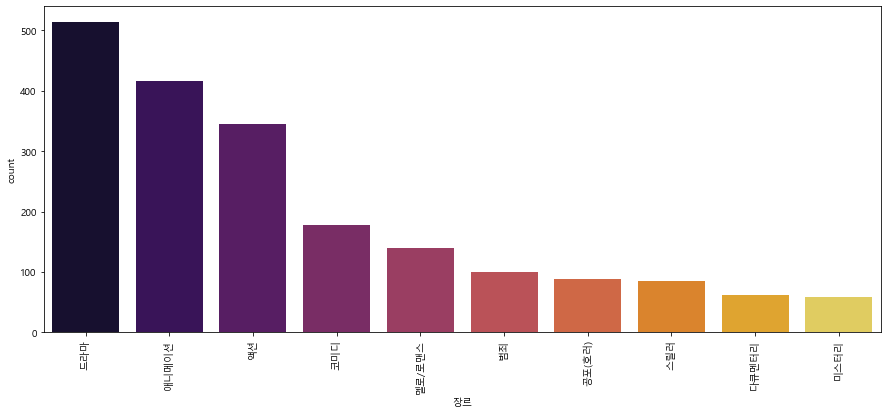

In [26]:
# 장르 top10(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.countplot(x = '장르', data=movie2011_2019, palette='inferno', order=movie2011_2019['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

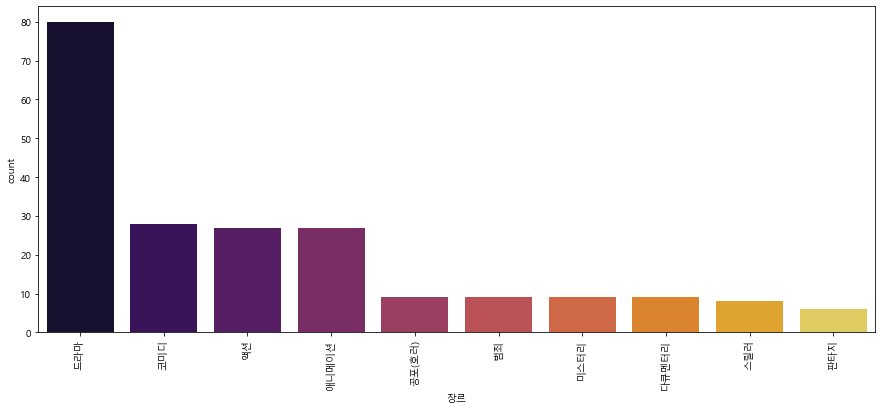

In [27]:
# 장르 top10(2020)
plt.subplots(figsize=(15,6))
sns.countplot(x = '장르', data=movie2020, palette='inferno', order=movie2020['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년 ~ 2019년
  - 드라마, 애니메이션, 액션 순으로 많은 영화가 만들어졌다
- 2020년
  - 드라마, 코미디, 액션 순으로 많은 영화가 만들어졌다
- 가장 인기있는 영화장르는 '드라마' 인 것을 알 수가 있다.
----

#### 국적 top10

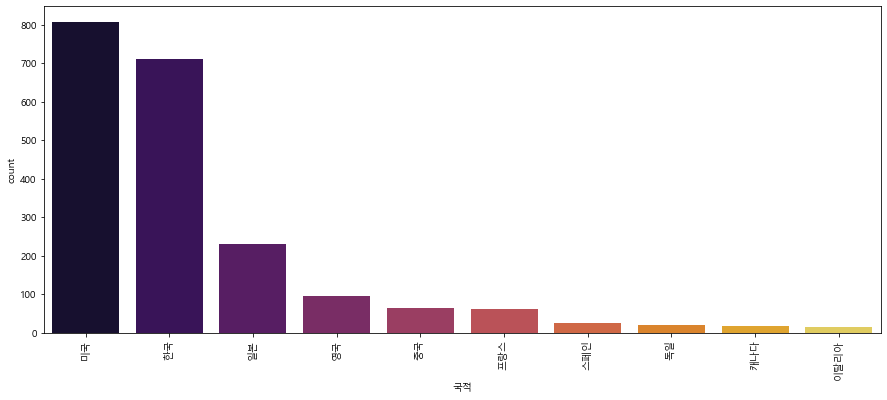

In [29]:
# 국적top10(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.countplot(x = '국적', data=movie2011_2019, palette='inferno', order=movie2011_2019['국적'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

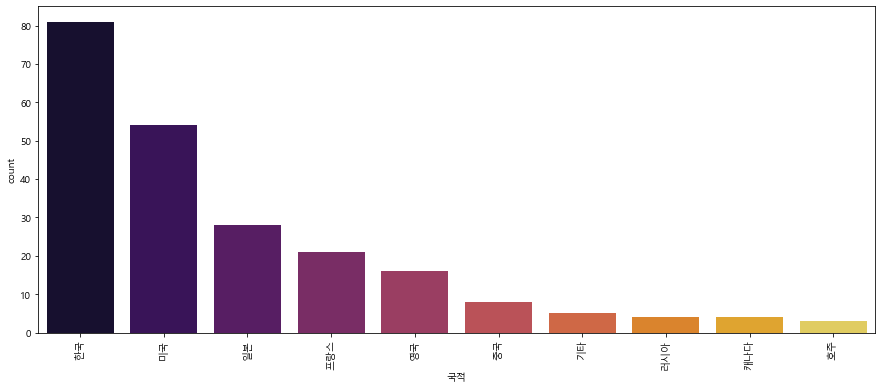

In [30]:
# 국적top10(2020)
plt.subplots(figsize=(15,6))
sns.countplot(x = '국적', data=movie2020, palette='inferno', order=movie2020['국적'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년에서 2020년까지 한국, 미국, 일본 영화가 대부분을 차지하고 있다.
---

#### 배급사 top10

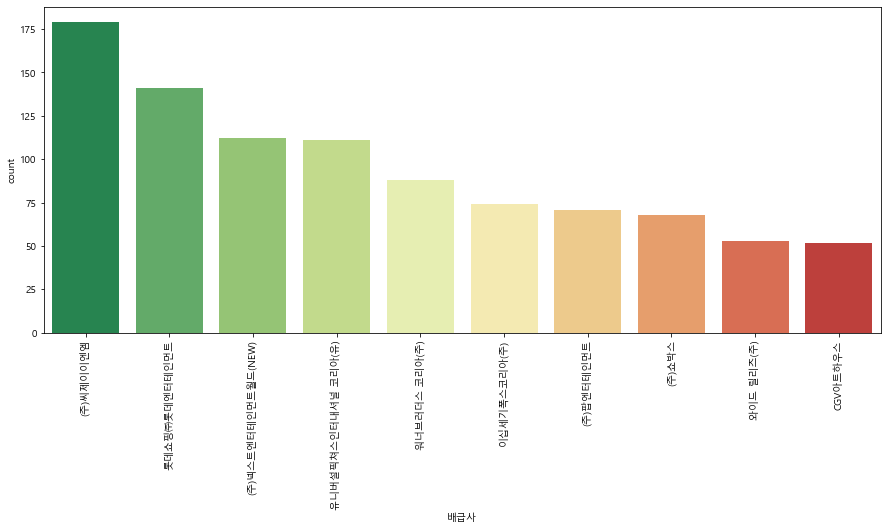

In [37]:
# 배급사 top10(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.countplot(x = '배급사', data=movie2011_2019, palette='RdYlGn_r', order=movie2011_2019['배급사'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

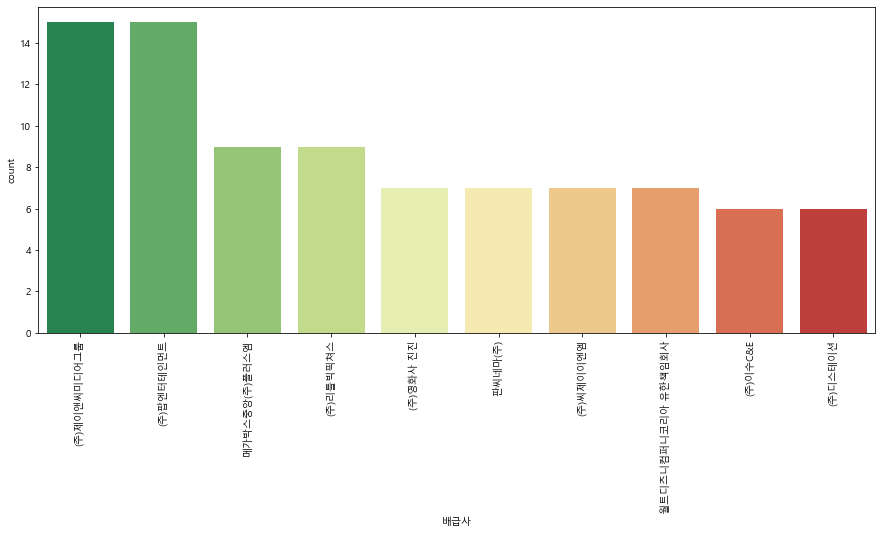

In [36]:
# 배급사 top10(2020)
plt.subplots(figsize=(15,6))
sns.countplot(x = '배급사', data=movie2020, palette='RdYlGn_r', order=movie2020['배급사'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년 ~ 2019년 데이터와 2020년에서 top10안에 드는 배급사 중에 겹치는 배급사
  - (주)씨제이엔엠, (주)립엔터테인먼트
---

#### 장르별 평균 관객수

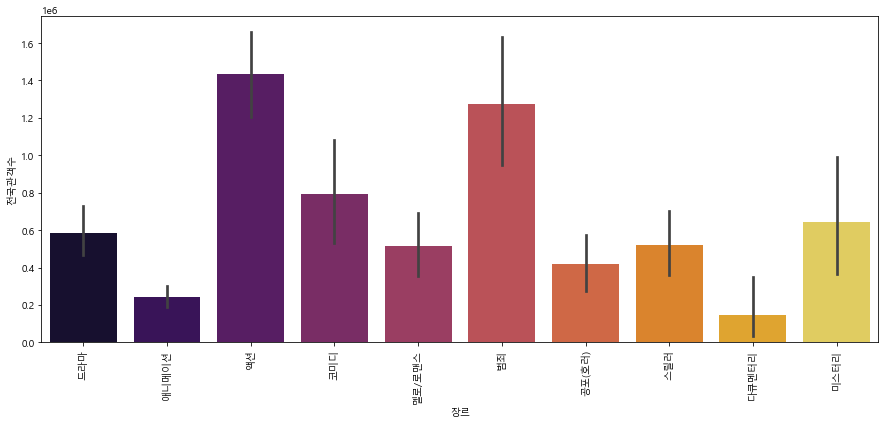

In [41]:
# 장르에 따른 평균 관객수(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2011_2019, x="장르", y = "전국관객수", palette='inferno', order=movie2011_2019['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

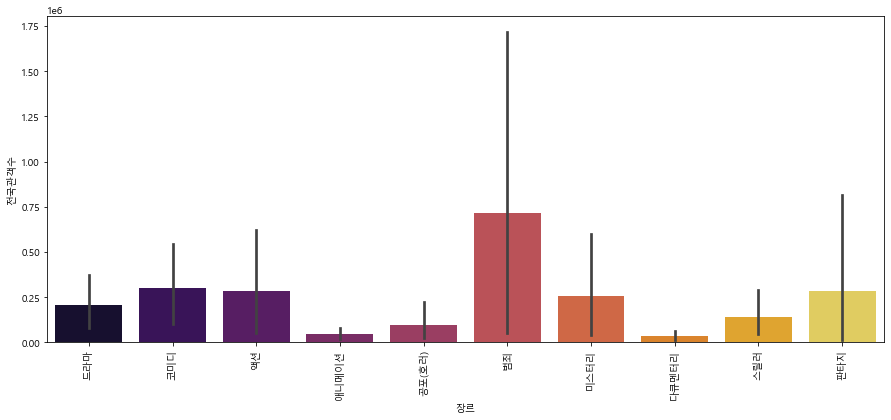

In [42]:
# 장르에 따른 평균 관객수(2020)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2020, x="장르", y = "전국관객수", palette='inferno', order=movie2020['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년 ~ 2019년 : 액션, 범죄, 코미디 순으로 관객수의 평균이 높음
- 2020년 : 범죄 장르 영화의 평균 관객수의 평균이 월등히 높음
---

#### 관람등급별 평균 관객수

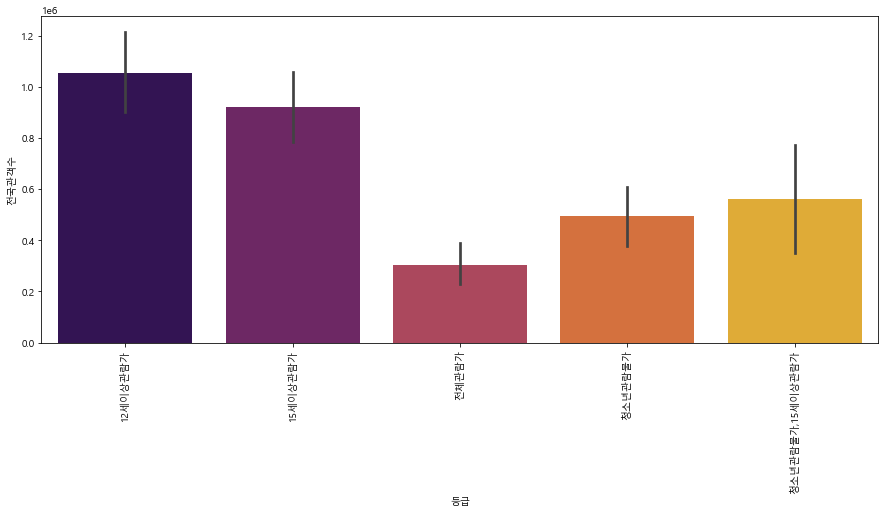

In [43]:
# 관람등급에 따른 평균 관객수(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2011_2019, x="등급", y = "전국관객수", palette='inferno')
plt.xticks(rotation=90)
plt.show()

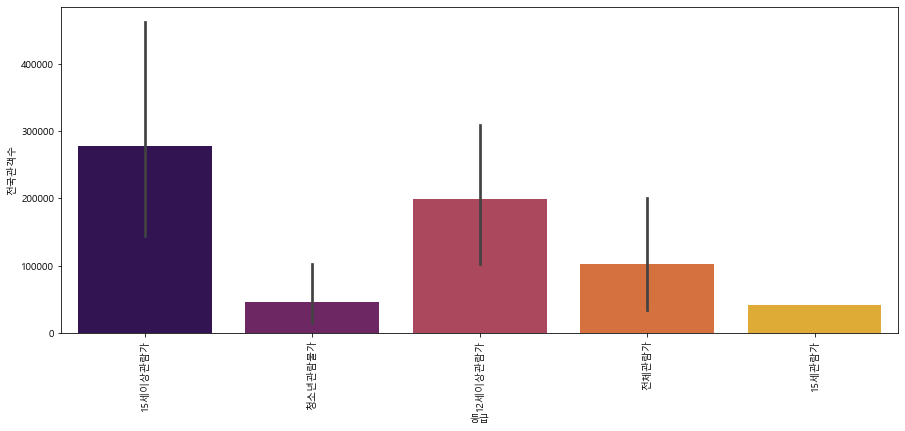

In [44]:
# 관람등급에 따른 평균 관객수(2020)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2020, x="등급", y = "전국관객수", palette='inferno')
plt.xticks(rotation=90)
plt.show()

- 2011년부터 2020년까지 15세이상 관람가의 관람객수의 평균이 가장 높음
---

#### 장르 top10별 평점의 평균

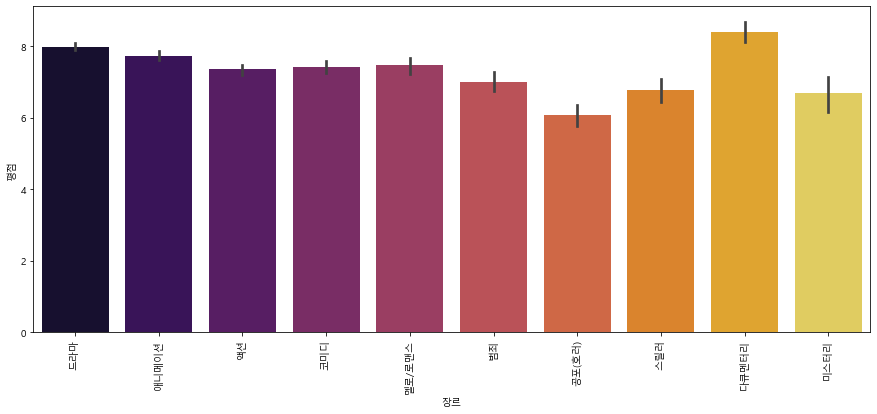

In [70]:
# 장르에 따른 평점의 평균(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2011_2019, x="장르", y = "평점", palette='inferno', order=movie2011_2019['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

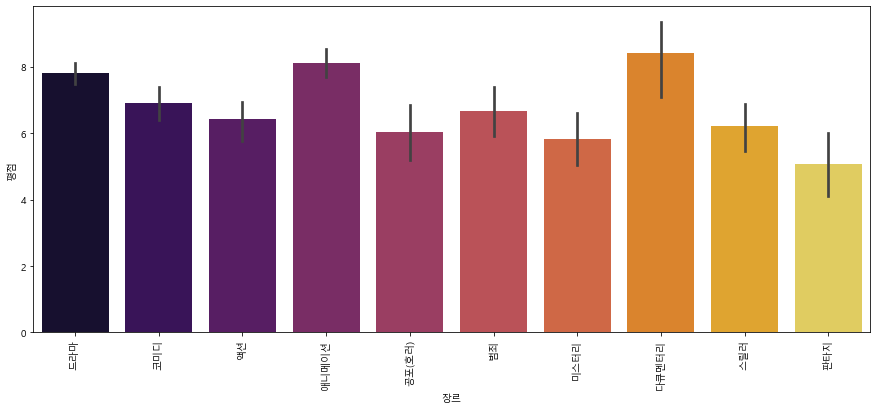

In [69]:
# 장르에 따른 평점의 평균(2020)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2020, x="장르", y = "평점", palette='inferno', order=movie2020['장르'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년 ~ 2019년 : 다큐멘터리, 드라마, 애니메이션 순으로 평점이 높음
- 2020년 : 다큐멘터리, 애니메이션, 드라마 순으로 평점이 높음
---

#### 국적 top10별 평점의 평균

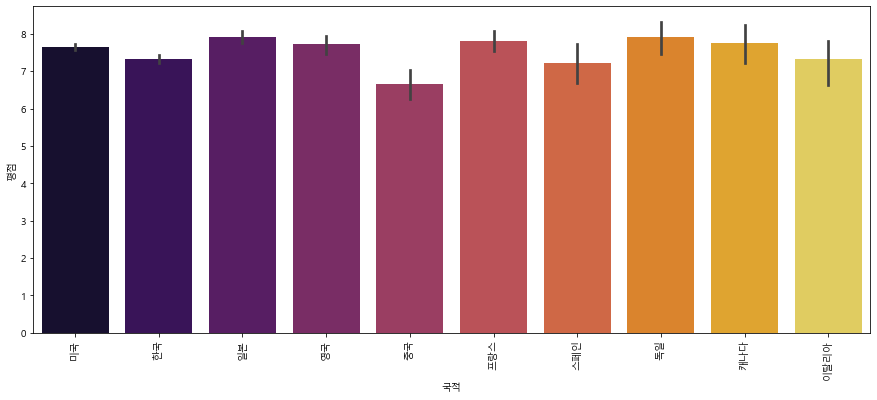

In [78]:
# 국적에 따른 평점의 평균(2011 - 2019)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2011_2019, x="국적", y = "평점", palette='inferno', order=movie2011_2019['국적'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

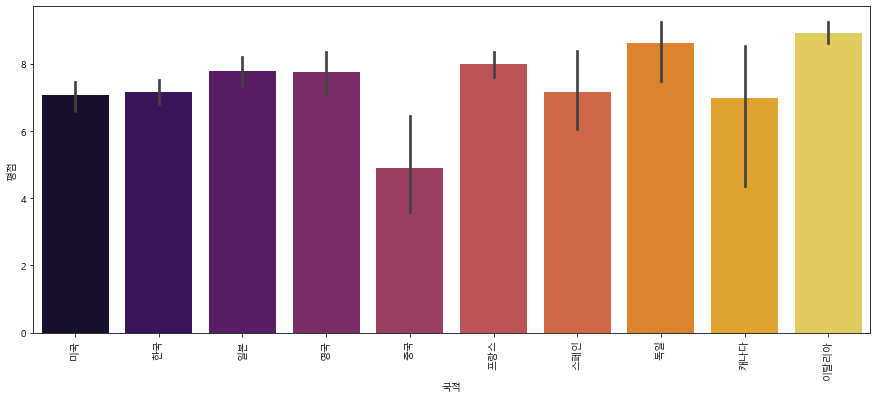

In [79]:
# 국적에 따른 평점의 평균(2020)
plt.subplots(figsize=(15,6))
sns.barplot(data=movie2020, x="국적", y = "평점", palette='inferno', order=movie2011_2019['국적'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.show()

- 2011년 ~ 2019년 : top10국가중에서 국가별 평점 평균 일본, 독일, 프랑스 순
- 2020년 : top10국가중에서 국가별 평점 평균 이탈리아, 독일, 프랑스 순
---

In [85]:
# 상관관계(2011 - 2019)
movie2011_2019.corr()

,전국스크린수,전국매출액,전국관객수,평점,평가자수,상영시간
전국스크린수,1.000000,0.748228,0.734337,0.017454,0.683258,0.228939
전국매출액,0.748228,1.000000,0.997487,0.121358,0.813970,0.185414
전국관객수,0.734337,0.997487,1.000000,0.122753,0.813065,0.181865
평점,0.017454,0.121358,0.122753,1.000000,0.126371,0.065268
평가자수,0.683258,0.813970,0.813065,0.126371,1.000000,0.188711
상영시간,0.228939,0.185414,0.181865,0.065268,0.188711,1.000000


In [87]:
# 상관관계(2020)
movie2020.corr()

,전국스크린수,전국매출액,전국관객수,평점,평가자수,상영시간
전국스크린수,1.000000,0.795679,0.796250,-0.150513,0.810303,0.138062
전국매출액,0.795679,1.000000,0.999644,-0.054462,0.908919,0.133304
전국관객수,0.796250,0.999644,1.000000,-0.056924,0.911631,0.133032
평점,-0.150513,-0.054462,-0.056924,1.000000,-0.093625,0.050440
평가자수,0.810303,0.908919,0.911631,-0.093625,1.000000,0.166146
상영시간,0.138062,0.133304,0.133032,0.050440,0.166146,1.000000
